In [ ]:
%pip install pandas sqlalchemy psycopg2-binary matplotlib python-dotenv

In [3]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASS = os.getenv("DB_PASS")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

engine = create_engine(f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

try:
    with engine.connect() as conn:
        print("Successfully connected to the database securely!")
except Exception as e:
    print(f"Connection failed: {e}")

Successfully connected to the database securely!


In [8]:
query = """
SELECT 
    d.date_id AS "Day",
    he.worked_out::int AS "Worked Out",
    (ga.studied_ou::int + ga.studied_de::int + ga.studied_french::int) AS "Total Study Sessions"
FROM metrics_table AS mt
INNER JOIN date AS d 
    ON mt.date_id = d.date_id
INNER JOIN health AS he 
    ON mt.health_metric_id = he.health_metric_id
INNER JOIN goals_achieved AS ga 
    ON mt.goal_metric_id = ga.goal_metric_id
ORDER BY "Day";
"""

df = pd.read_sql(query, engine)

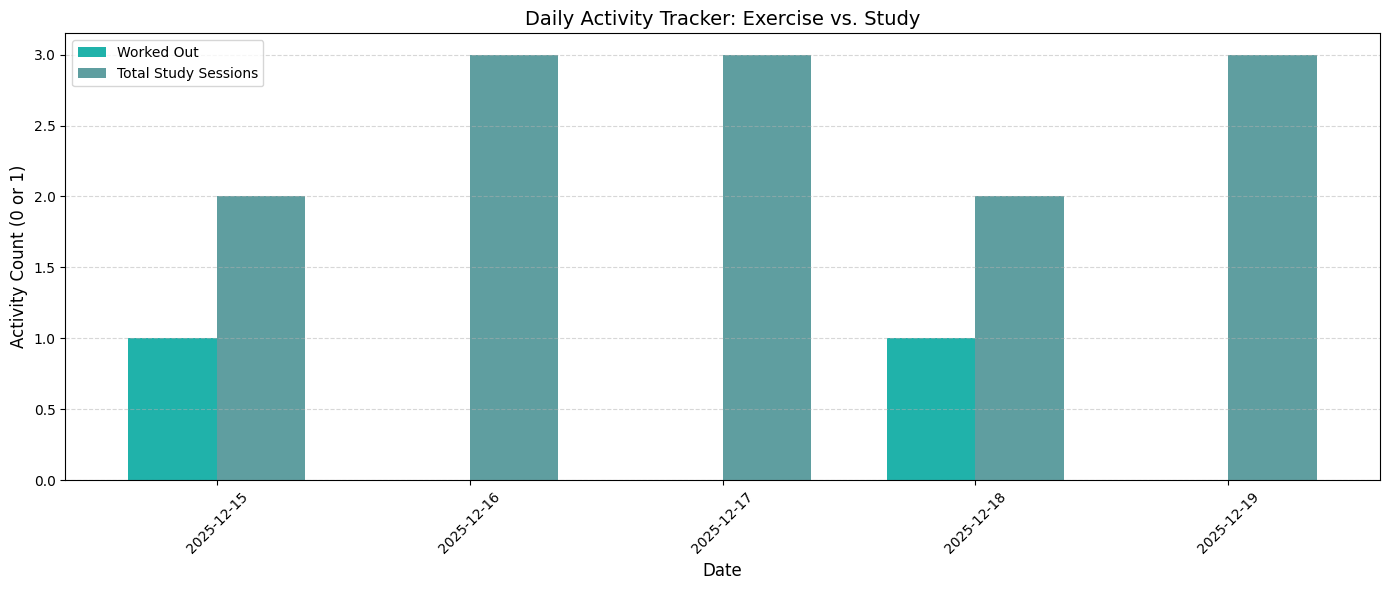

In [10]:
import matplotlib.pyplot as plt

df_daily = pd.read_sql(query, engine)
df_daily['Day'] = pd.to_datetime(df_daily['Day']).dt.date

df_daily.plot(
    x='Day', 
    y=['Worked Out', 'Total Study Sessions'], 
    kind='bar', 
    figsize=(14, 6),
    width=0.7,
    color=['#20b2aa', '#5f9ea0']
)

plt.title('Daily Activity Tracker: Exercise vs. Study', fontsize=14)
plt.ylabel('Activity Count (0 or 1)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()